## A Preliminary analysis of the geograhpical distribution of US banks in 2019

### Understanding and Prepossessing the data: 2. Details of three entities (HCR)

In [105]:
import os
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from IPython.display import Image

Reading the raw datasets saved from the previous section.

In [104]:
# Set the working directory
os.chdir('C:\\Users\\jiash\\Dropbox\\hw\\git\\bank_geo\\data')

# Read the data and the metadata file
hcr_raw = pd.read_csv('hcr_raw.csv', encoding = "ISO-8859-1")

To understand the three datasets (entity) better, the below two functions verify whether an input (varname) is a primary key of the entity (df). The other function add_occurence_to finds the duplicates of varname in df.

In [4]:
# verify if varname is a primary key of df
def is_primay_key(df, varname):
    
    # the number of primary keys should match the number of records
    flag = len(df[varname].unique()) == df.shape[0]
    
    return(flag)

# count the occurence of varname in df and add it as a column in df
def add_occurence_to(df, varname):
    
    # frequency of varname in df
    freq = df[varname].value_counts().to_frame()
    freq.reset_index(level = 0, inplace = True)
    freq.columns = [varname, 'freq']
    
    df = pd.merge(df, freq, how = 'left', on = varname)
    
    return(df)

#### Understanding the HCR data
Verify whether the 'RSSDHCR' is a primary key of hcr_raw.

In [108]:
# a snapshot of the data
hcr_raw.head()

,Unnamed: 0,CITYHCR,HCTMULT,NAMEHCR,RSSDHCR,STALPHCR
0,0,BOSTON,MULT,STATE STREET CORPORATION,1111435,MA
1,3,AUBURN,ONE,"AUBURN NATIONAL BANCORPORATION, INC.",1129533,AL
2,11,DEMOPOLIS,ONE,"RBC, INC.",2526755,AL
3,18,PHENIX CITY,ONE,"PHENIX-GIRARD BANCSHARES, INC.",2013246,AL
4,22,CULLMAN,ONE,"MERCHANTS FINANCIAL SERVICES, INC.",1082955,AL


In [7]:
# cleaning the HCR data
print('1. Is RSSDHCR the primary key of hcr_raw?')
is_primay_key(hcr_raw, 'RSSDHCR')

1. Is RSSDHCR the primary key of hcr_raw?


False

Export the duplicates of RSSDHCR in hcr_raw:

In [8]:
# Some of the replicates in RSSDHCR looks like this
temp = add_occurence_to(hcr_raw, 'RSSDHCR')
temp[temp['freq'] > 1].sort_values('RSSDHCR')

,Unnamed: 0,CITYHCR,HCTMULT,NAMEHCR,RSSDHCR,STALPHCR,freq
6,34,NaN,NONE,NaN,0,NaN,2
919,29540,NaN,MULT,NaN,0,NaN,2
2953,69682,BRANDENBURG,ONE,"MEADE BANCORP, INC.",1100309,KY,2
3824,84278,BRANDENBURG,MULT,"MEADE BANCORP, INC.",1100309,KY,2
2913,69032,MUMBAI,ONE,STATE BANK OF INDIA,1242562,NaN,2
3409,78845,MUMBAI,NONE,STATE BANK OF INDIA,1242562,NaN,2
2928,69263,HONG KONG,ONE,"BANK OF EAST ASIA, LIMITED, THE",1244221,NaN,2
3404,78839,HONG KONG,NONE,"BANK OF EAST ASIA, LIMITED, THE",1244221,NaN,2
478,12578,JACKSONVILLE,MULT,JSA FAMILY LIMITED PARTNERSHIP,3035227,TX,2
2064,53746,JACKSONVILLE,ONE,JSA FAMILY LIMITED PARTNERSHIP,3035227,TX,2


There're several patterns in the above duplicated RSSDHCR and as a response to that, I decide to 1. remove all 0s in RSSDHCR; 2. remove all NONE in HCTMULT; 3. keep the MULT when both ONE and MULT are present within one RSSDHCR.

In [9]:
# From the above samples, we need to take following steps:
# 1. remove all 0 in RSSDHCR
# 2. remove all NONE in HCTMULT
# 3. only keep MULT when both ONE and MULT are present

hcr_cleaned = add_occurence_to(hcr_raw, 'RSSDHCR')
hcr_cleaned.drop(hcr_cleaned[hcr_cleaned.RSSDHCR == 0].index, inplace = True)
hcr_cleaned.drop(hcr_cleaned[(hcr_cleaned.freq == 2) & (hcr_cleaned.HCTMULT == 'NONE')].index, inplace = True)
hcr_cleaned.drop(['freq'], axis = 1, inplace = True)
hcr_cleaned = add_occurence_to(hcr_cleaned, 'RSSDHCR')
hcr_cleaned.drop(hcr_cleaned[(hcr_cleaned.freq == 2) & (hcr_cleaned.HCTMULT == 'ONE')].index, inplace = True)
hcr_cleaned.drop(['freq'], axis = 1, inplace = True)

Once done, we find RSSDHCR becomes the primary key:

In [10]:
# cleaning the HCR data
print('2. Is RSSDHCR the primary key of hcr_cleaned now?')
is_primay_key(hcr_cleaned, 'RSSDHCR')

2. Is RSSDHCR the primary key of hcr_cleaned now?


True

In [94]:
# Below table summarize the distribution of HCRs by states
state_hcr = hcr_cleaned['STALPHCR'].value_counts().to_frame()
state_hcr.reset_index(level = 0, inplace = True)
state_hcr.columns = ['state', 'freq']
state_hcr = state_hcr.sort_values(['freq'], ascending = False)
state_hcr['fraction'] = state_hcr['freq']/state_hcr['freq'].sum() * 100

top_num = 5
top_state_hcr = state_hcr.iloc[0:top_num,]
top_state_hcr.loc[top_num] = ['Other', 
                              state_hcr['freq'].sum() - top_state_hcr['freq'].sum(),
                             100 - top_state_hcr['fraction'].sum()]

C:\Users\jiash\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"rowspan": 2, "type": "choropleth"}, {"type": "pie"}],
           [None, {}]],
    subplot_titles=("Geographic distribution","Pie chart of HCR number", "Bar chart of HCR number"))

fig.add_trace(go.Choropleth(locations = state_hcr['state'], # Spatial coordinates
    z = state_hcr['freq'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Number of HCRs"), 1, 1)
fig.update_layout(
    title_text = 'Distribution of HCRs by State',
    geo_scope='usa', # limite map scope to USA
)
fig.add_trace(go.Pie(labels = list(top_state_hcr['state']), values = list(top_state_hcr['fraction']),
                     textposition='inside'), 1, 2)
fig.add_trace(go.Bar(x = list(top_state_hcr['state'])[0:top_num], y = list(top_state_hcr['freq'])[0:top_num], 
                     text = top_state_hcr['state'],
                     textposition = 'auto'), 2, 2)
fig.update_layout(legend_orientation="h")
fig.show()      

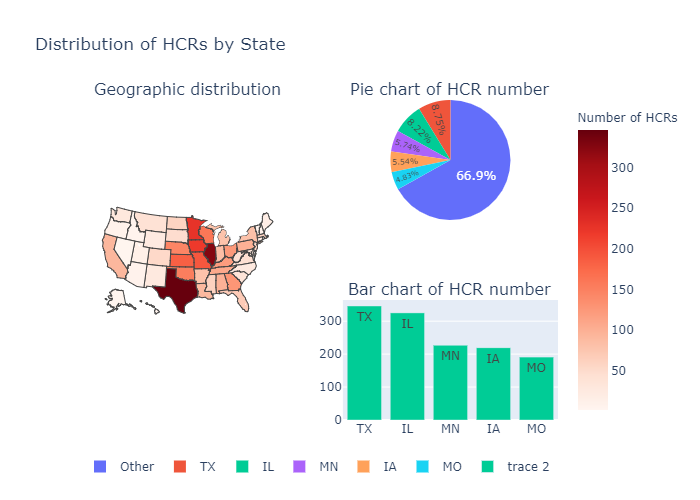

In [106]:
fig.write_image("C:/Users/jiash/Dropbox/hw/git/bank_geo/P2_HCR.png")
Image(filename = 'C:/Users/jiash/Dropbox/hw/git/bank_geo/P2_HCR.png')

From the above visuals, we find that TX and IL stand out as the most concentrated HCR states. Some other states in Midwest also stand out, such as MN, IA and MO. In total the five states with most HCRs take up about 30% of the nation total